In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import rc
import seaborn as sns
import os
import glob
sns.set(style='ticks')
import json
s = json.load( open(r"../custom.json"))  #edit path to json file\n",
plt.rcParams.update(s)
from scipy.optimize import curve_fit

In [16]:
def func_op(P, a,c):
    return 1731*(1+P/a)**(c) 
def func_tp(P, a,c):
    return 1725*(1+P/a)**(c) 

In [17]:
# columns =['S.N','Pressure','Superheating','Supercooling','Melting']
file =r"E:\Documents\Research\Molecular Dynamics\Code\GitHub\LAMMPS\Melting\Melting.xlsx"

In [18]:
# pd.ExcelFile(file)

In [19]:
df_op = pd.read_excel(file, sheet_name="One Phase")
df_tp = pd.read_excel(file, sheet_name="Two Phase")
df_zh = pd.read_excel(file, sheet_name="Zhang")
df_lz = pd.read_excel(file, sheet_name="Lazor")
df_ed = pd.read_excel(file, sheet_name="Errandonea")

In [20]:
df_op

,S.N,Pressure,Superheating,Supercooling,Melting
0,1,0,2102,1249,1731
1,2,5,2301,1355,1890
2,3,10,2507,1499,2067
3,4,15,2694,1548,2200
4,5,20,2852,1746,2367
5,6,30,3201,1898,2634
6,7,50,3753,2299,3115
7,8,80,4502,2800,3752
8,9,100,4944,3001,4093


In [21]:
df_tp["Melting"]=df_tp[["Liquid","Solid"]].mean(axis=1)
df_tp

,S.N,Pressure,Solid,Liquid,Melting
0,1,0,1700,1750,1725.0
1,2,5,1900,1950,1925.0
2,3,10,2050,2100,2075.0
3,4,15,2200,2250,2225.0
4,5,20,2350,2400,2375.0
5,6,30,2650,2700,2675.0
6,7,50,3100,3150,3125.0
7,8,80,3700,3750,3725.0
8,9,100,4000,4050,4025.0


In [22]:
df_zh=df_zh[0:7]

In [23]:
df_ed

,S.N,Pressure,Melting
0,1,0.0,1768
1,2,15.2,2013
2,3,19.7,2081
3,4,28.5,2127
4,5,53.1,2463
5,6,58.6,2545


In [24]:
df_lz

,S.N,Pressure,Melting
0,1,0.0,1691
1,2,9.7,2064
2,3,20.5,2384
3,4,31.4,2512
4,5,44.6,2656
5,6,56.3,2867
6,7,73.2,3195
7,8,99.7,3291


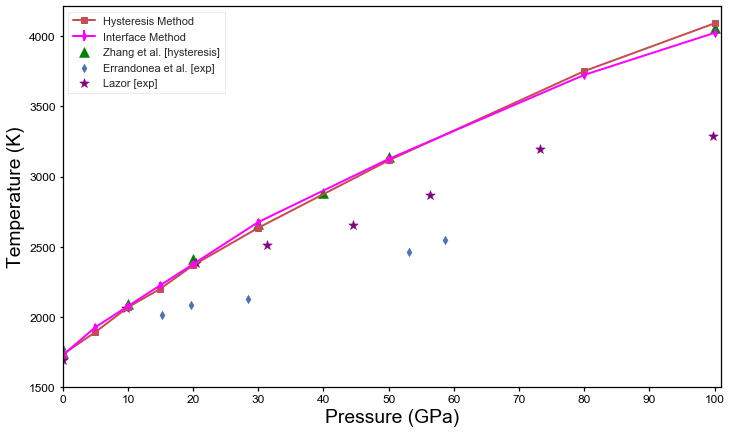

In [29]:
fig,ax = plt.subplots(1)

ax.plot(df_op.Pressure, df_op.Melting,marker ="s",color="r",label="Hysteresis Method")
ax.errorbar(df_tp.Pressure, df_tp.Melting ,yerr=25,marker ="d",markersize=5,label="Interface Method",color="magenta")
ax.scatter(df_ed.Pressure, df_ed.Melting,marker ="d",label="Errandonea et al. [exp]")
# plt.plot(df_zh.Pressure, df_zh.Melting,"g--",marker ="^",label="Zhang et al. [hysteresis]")
ax.scatter(df_zh.Pressure, df_zh.Melting,marker ="^",label="Zhang et al. [hysteresis]",s=100,color="green")
ax.scatter(df_lz.Pressure, df_lz.Melting,marker ="*",label="Lazor [exp]",color="purple",s=100)

# plt.plot(df_zh.Pressure,func_op(df_zh.Pressure,26.456,0.552),"o--",marker ="d",markersize=8,label="Fit Op")
# plt.plot(df_zh.Pressure,func_op(df_zh.Pressure,20.899,0.485),"o--",marker ="d",markersize=8,label="Fit Tp")
# plt.(x_values, y_values,   ,fmt='o', markersize=8)
plt.xlabel("Pressure (GPa)")
plt.ylabel("Temperature (K)")
plt.yticks(range(1500,4500,500))
plt.xticks(range(0,125,10))
plt.xlim((0,101))
handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[4], handles[2],handles[1],handles[3]]
labels = [labels[0], labels[4], labels[2],labels[1],labels[3]]

ax.legend(handles,labels,loc=2)
# plt.show()
# plt.legend()
# plt.axis("scaled")
# plt.tight_layout()
# print(dir(plt))
plt.savefig("melting_curve.png",dpi=300)
plt.show()

In [26]:
param_op,cov_op = curve_fit(func_op, df_op.Pressure, df_op.Melting)
param_op

array([26.45479788,  0.55233137])

In [27]:
param_tp,cov_tp = curve_fit(func_tp, df_tp.Pressure, df_tp.Melting)
param_tp

array([20.89877894,  0.48534677])

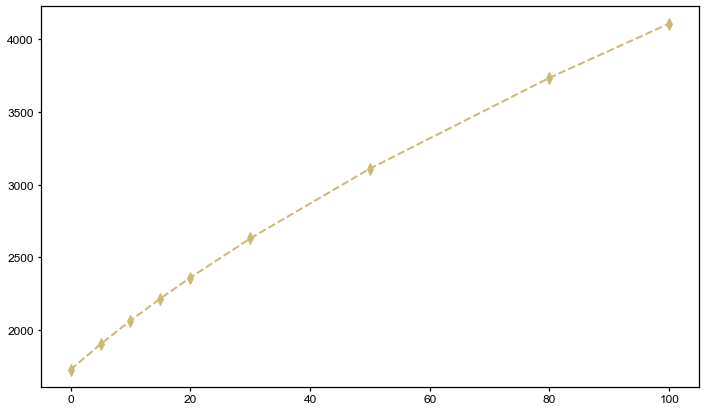

In [28]:
plt.plot(df_op.Pressure,func_op(df_op.Pressure,26.456,0.552),"y--",marker ="d",markersize=8,label="Errandonea et al. [exp]")